In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS)

/usr/lib64/python3.11/tarfile.py:2253: RuntimeWarning: The default behavior of tarfile extraction has been changed to disallow common exploits (including CVE-2007-4559). By default, absolute/parent paths are disallowed and some mode bits are cleared. See https://access.redhat.com/articles/7004769 for more details.
  warnings.warn(


In [5]:
files = get_image_files(path/"images")
def label_func(f): return f[0].isupper()
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

/home/shahpouriz/Data/new_env/lib64/python3.11/site-packages/torch/cuda/__init__.py:141: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11070). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


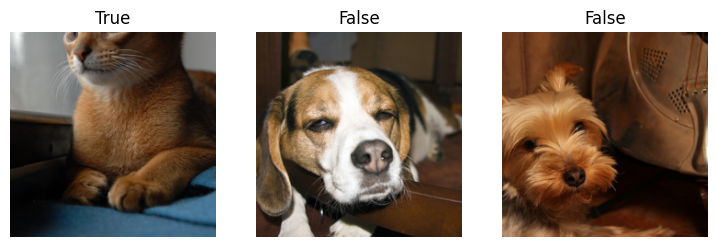

In [6]:
dls.show_batch(max_n=3)

In [7]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)


/home/shahpouriz/Data/new_env/lib64/python3.11/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/shahpouriz/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 126MB/s] 


SuggestedLRs(valley=0.0012022644514217973)

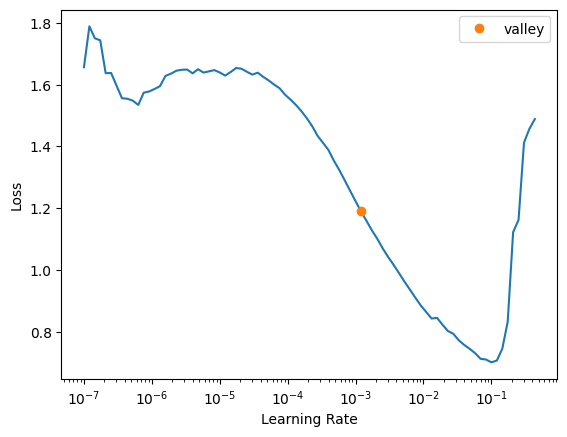

In [9]:
learn.lr_find()

In [14]:
learn.fine_tune(1, base_lr = 9e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.105678,0.015004,0.004060,09:21


epoch,train_loss,valid_loss,error_rate,time
0,0.082431,0.015188,0.004736,17:01


SuggestedLRs(valley=0.00013182566908653826)

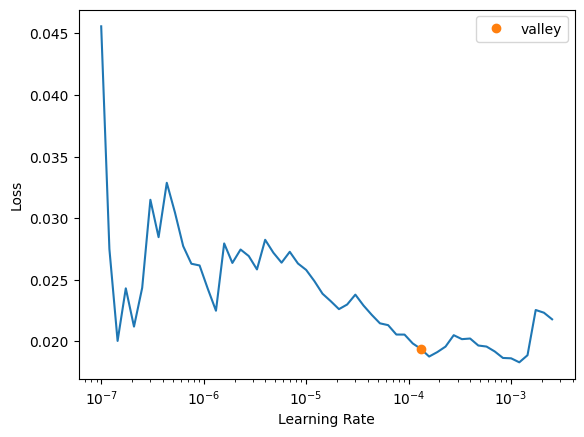

In [17]:
learn.lr_find()

In [18]:
learn.fit_one_cycle(1,9e-7)

epoch,train_loss,valid_loss,error_rate,time


In [ ]:
learning_rate = 1e-4  # Start with a learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)


